##### Модели пространства состояний. Разложение ряда

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import UnobservedComponents # разложение на компоненты

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
gdp = web.DataReader(name='NA000334Q', data_source='fred', start='1990-01-01')
y = np.log(gdp)

### Проверим случай с глобальным трендом

In [ ]:
# Выбираем какие компоненты включить в модель
# Потом через кросс-валидацию можно определить, какая модель лучше
mod = UnobservedComponents(y, level=True, trend=True, seasonal=4, cycle=False, stochastic_level=False, stochastic_trend=False, stochastic_seasonal=True, stochastic_cycle=False)
res = mod.fit()
# res.summary()

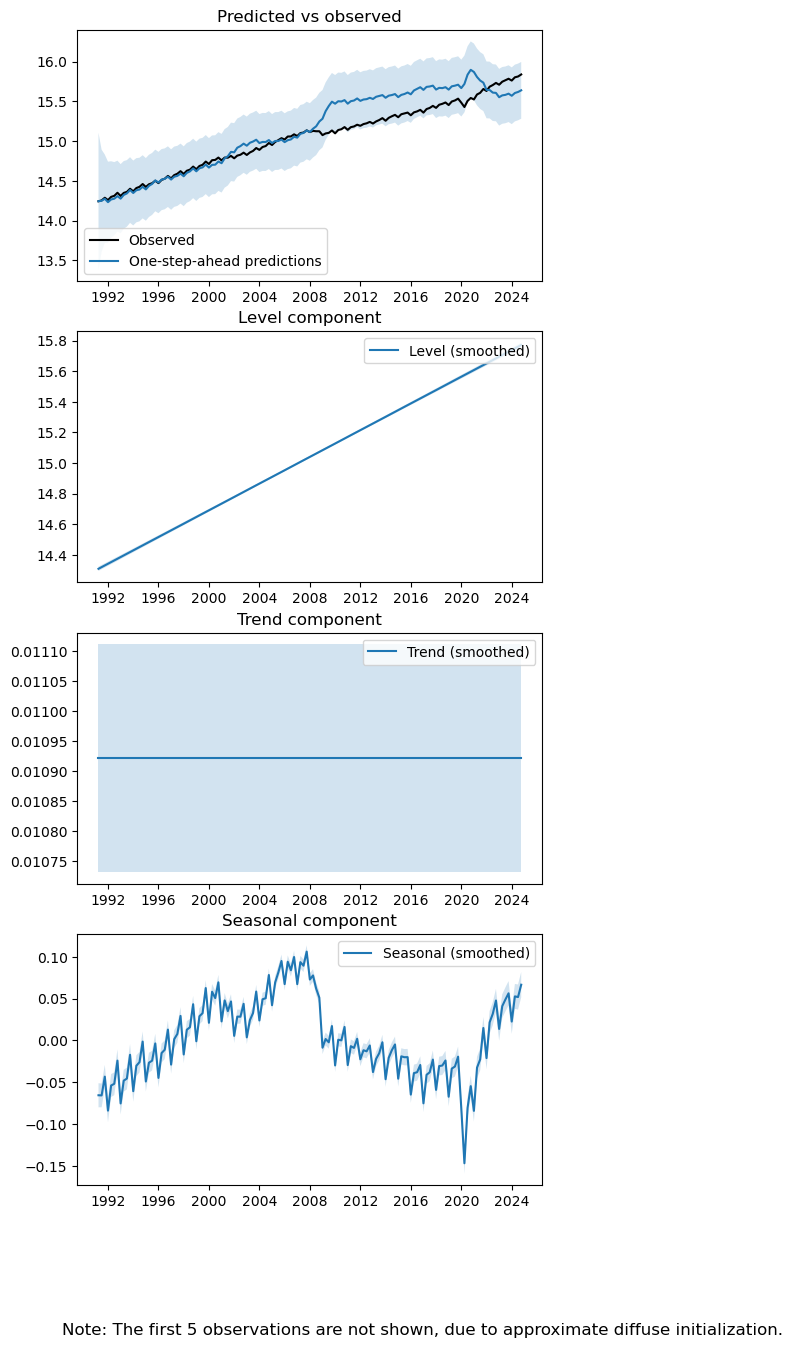

In [5]:
# визуализация компонент
fig = res.plot_components(figsize=(6, 15))

# изменим положение легенды для каждого подграфика
for i in range(y.shape[1]):
	fig.axes[i].legend(loc=3)
	
plt.show()

На сезонность не очень похоже

### Посмотрим на стохастическую сезонность и стохастический (локальный) тренд

In [10]:
# Выбираем какие компоненты включить в модель
# Потом через кросс-валидацию можно определить, какая модель лучше
mod = UnobservedComponents(y, level=True, trend=True, seasonal=4, cycle=False, stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True, stochastic_cycle=False)
res = mod.fit()
# res.summary()

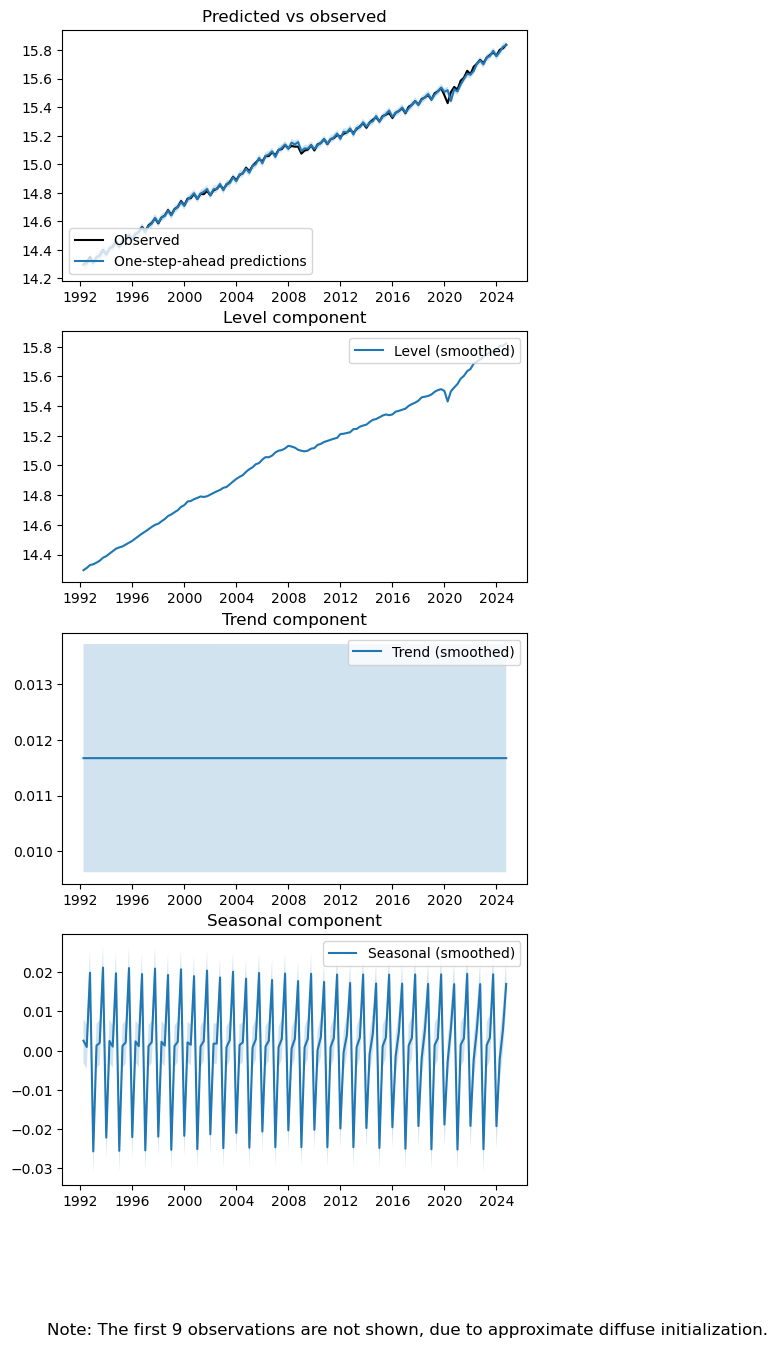

In [9]:
# визуализация компонент
fig = res.plot_components(figsize=(6, 15))

# изменим положение легенды для каждого подграфика
for i in range(y.shape[1]):
	fig.axes[i].legend(loc=3)
	
plt.show()

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                    NA000334Q   No. Observations:                  140
Model:                                 None   Log Likelihood                 392.838
                   + stochastic seasonal(4)   AIC                           -779.676
Date:                      Tue, 15 Apr 2025   BIC                           -770.960
Time:                              10:09:51   HQIC                          -776.134
Sample:                          01-01-1990                                         
                               - 10-01-2024                                         
Covariance Type:                        opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level        0.0002   7.94e-06     19.190      0.000       0.000       0.000
sigma2.trend     2.296e-11   4.96e-08      0.000      1.000   -9.71e-08    9.72e-08
sigma2.seasonal  1.514e-07   1.54e-07      0.986      0.324    -1.5e-07    4.52e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              2711.69
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              14.60   Skew:                            -1.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# Выбираем какие компоненты включить в модель
# Потом через кросс-валидацию можно определить, какая модель лучше
mod = UnobservedComponents(y, level=True, trend=True, seasonal=None, cycle=True, stochastic_level=True, stochastic_trend=True, stochastic_seasonal=False, stochastic_cycle=True)
res = mod.fit()
# res.summary()

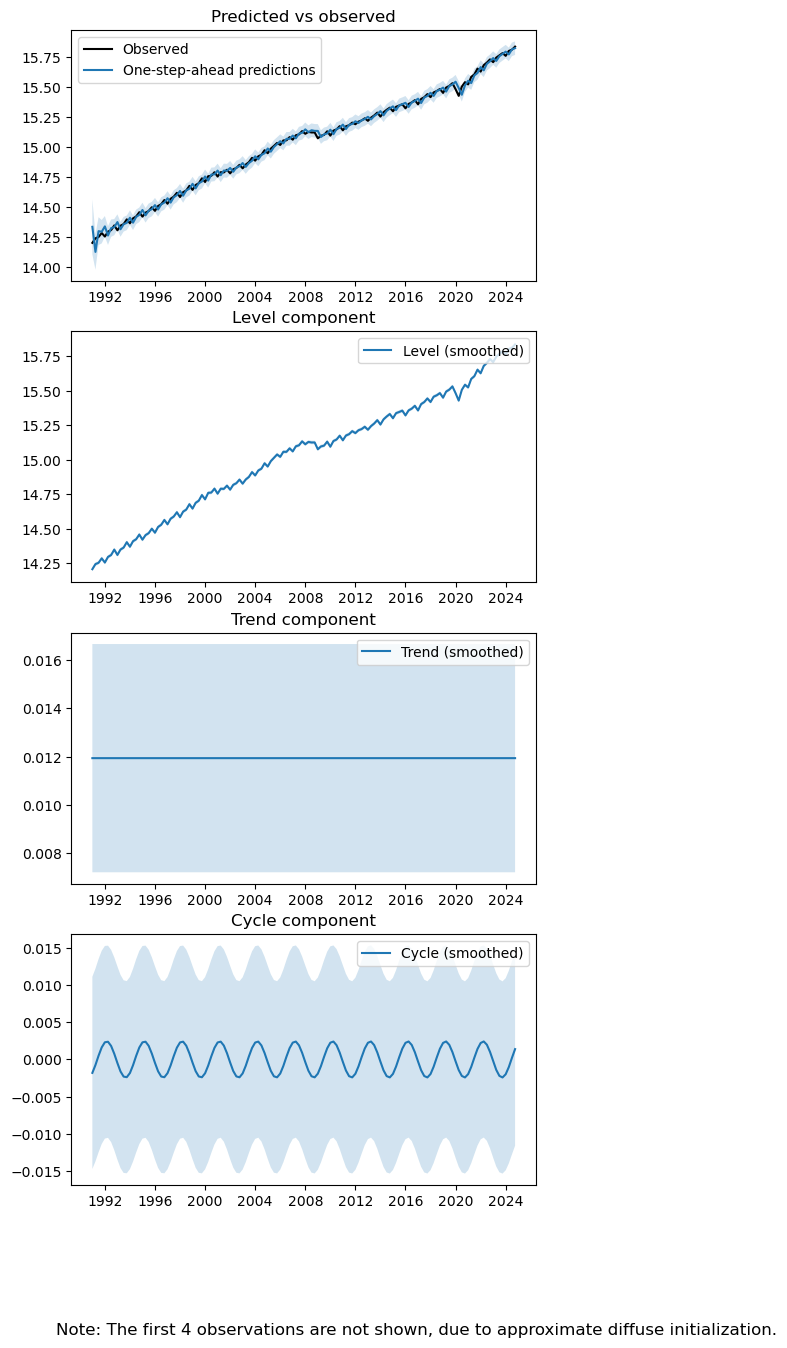

In [44]:
# визуализация компонент
fig = res.plot_components(figsize=(6, 15))

# изменим положение легенды для каждого подграфика
for i in range(y.shape[1]):
	fig.axes[i].legend(loc=2)
	
plt.show()

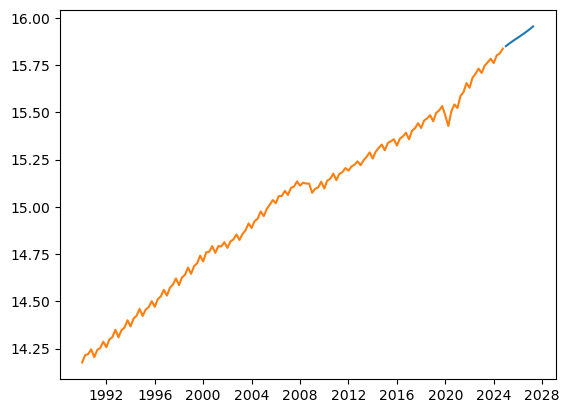

In [45]:
# Визуализация прогноза
plt.plot(res.forecast(steps=10))
plt.plot(y)
plt.show()

#### ДЗ:

Log(M2NS): seasonal 6, 12 | global, local trends

Кросс-валидация: SARIMA (AutoARIMA) (1,1,1)/(1,1,1)seas vs State Space model